In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [2]:
dataset3 = pd.read_csv('Exp_3.csv')
X3 = dataset3.iloc[:, :-1].values
y3 = dataset3.iloc[:, -1].values

In [3]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X3)
X3 = imp_mean.transform(X3)

In [4]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [6]:
models3 = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [8]:
for i, model3 in enumerate(models3):
    print(f"Training {model_names[i]}...")
    model3.fit(X3_train,y3_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 0.6235294117647059
KNN confusion matrix:
[[152  22]
 [ 74   7]]
KNN ROC AUC: 0.441961118206329


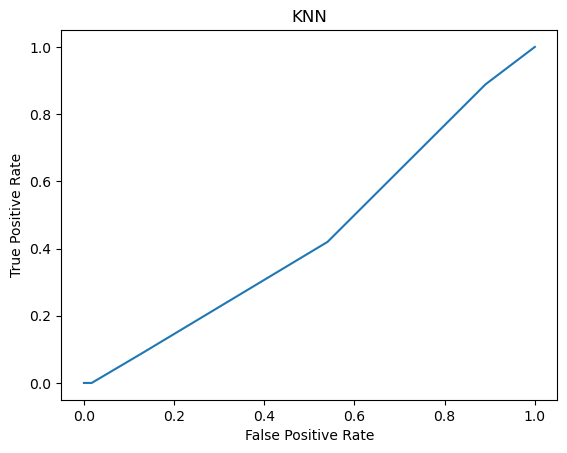

----------------------------------------------------
BPNN accuracy: 0.6823529411764706
BPNN confusion matrix:
[[174   0]
 [ 81   0]]
BPNN ROC AUC: 0.473428409252164


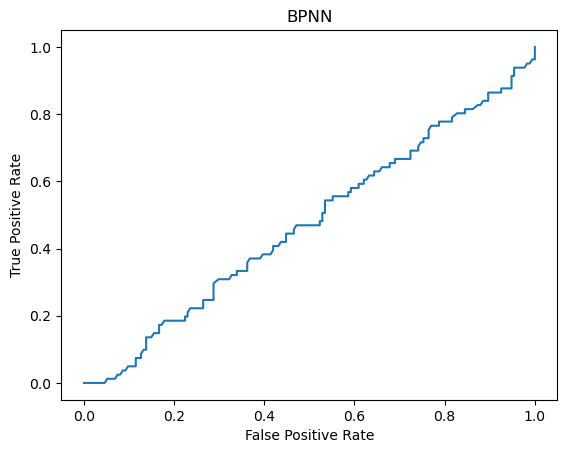

----------------------------------------------------
Kernel SVM accuracy: 0.6823529411764706
Kernel SVM confusion matrix:
[[174   0]
 [ 81   0]]
Kernel SVM ROC AUC: 0.5479991485738612


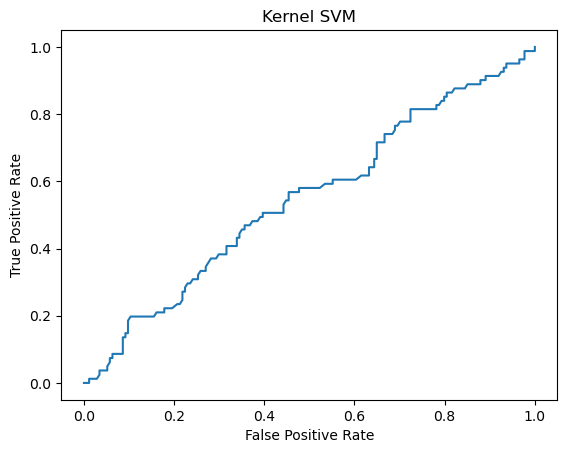

----------------------------------------------------
Random Forest accuracy: 0.6078431372549019
Random Forest confusion matrix:
[[140  34]
 [ 66  15]]
Random Forest ROC AUC: 0.4002767134951043


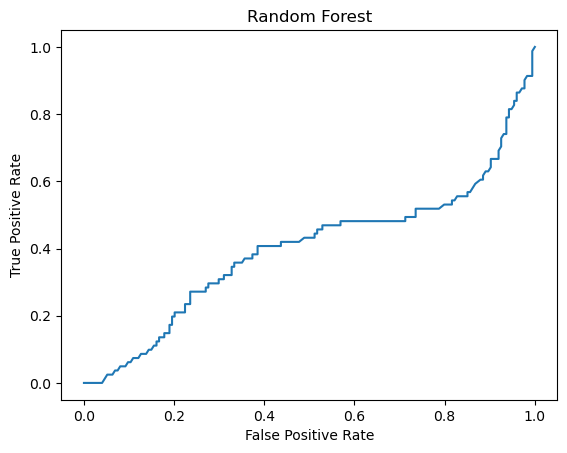

----------------------------------------------------
Adaboost Random Forest accuracy: 0.592156862745098
Adaboost Random Forest confusion matrix:
[[137  37]
 [ 67  14]]
Adaboost Random Forest ROC AUC: 0.3850219951752518


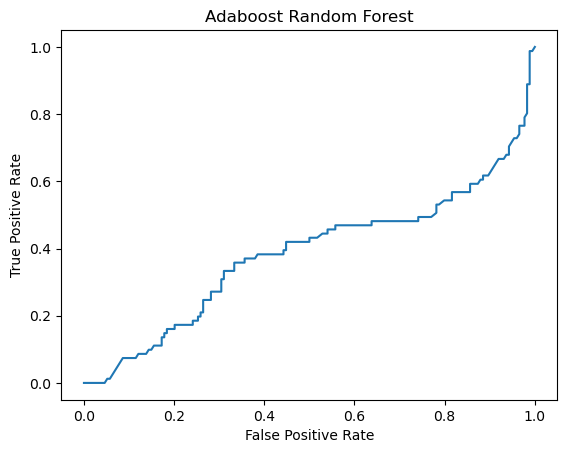

----------------------------------------------------
Adaboost SVM accuracy: 0.6823529411764706
Adaboost SVM confusion matrix:
[[174   0]
 [ 81   0]]
Adaboost SVM ROC AUC: 0.533737760749255


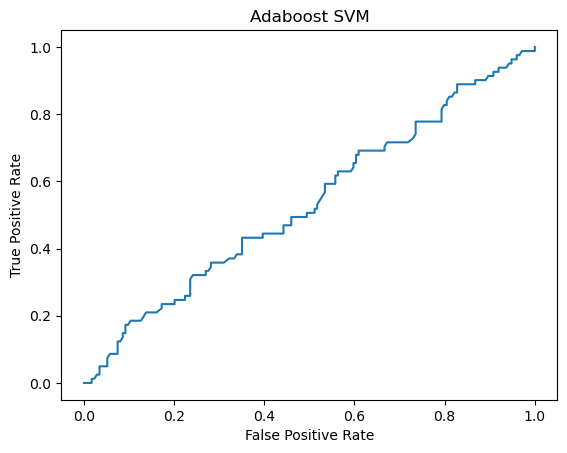

----------------------------------------------------
XGBoost accuracy: 0.6039215686274509
XGBoost confusion matrix:
[[143  31]
 [ 70  11]]
XGBoost ROC AUC: 0.41333191428976873


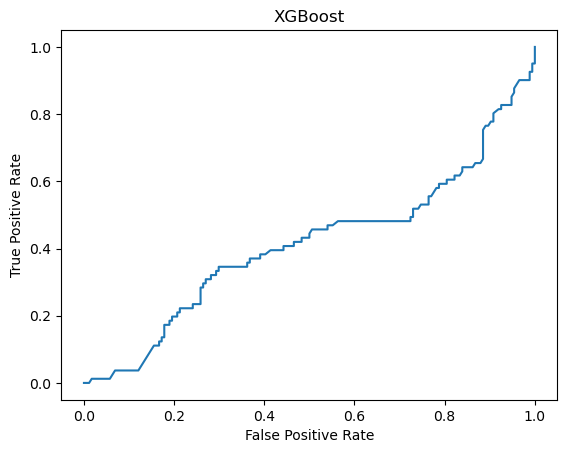

----------------------------------------------------


In [9]:
for i, model3 in enumerate(models3):
    y_pred = model3.predict(X3_test)
    acc = accuracy_score(y3_test, y_pred)
    cm = confusion_matrix(y3_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y3_test, model3.predict_proba(X3_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")

In [12]:
X3p = dataset3.iloc[: , :-1]
y3p = dataset3.iloc[:, -1]

In [13]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X3p)
X3p = imp_mean.transform(X3p)

In [15]:
pca = PCA(n_components = 2)
pca.fit(X3p)
x_pca = pca.transform(X3p)

In [16]:
x_pca = pd.DataFrame(x_pca, columns = ['Feature_1', 'Feature_2'])
x_pca.head()

,Feature_1,Feature_2
0,0.044696,-0.401068
1,-0.387407,0.054970
2,-1.855849,1.527626
3,-0.305183,-0.776144
4,-2.004517,-0.437888


In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y3p = label_encoder.fit_transform(y3p)
y3p = pd.DataFrame(y3p, columns = ['Target'])

In [18]:
x_pca = pd.concat([x_pca, y3p], axis = 1)

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

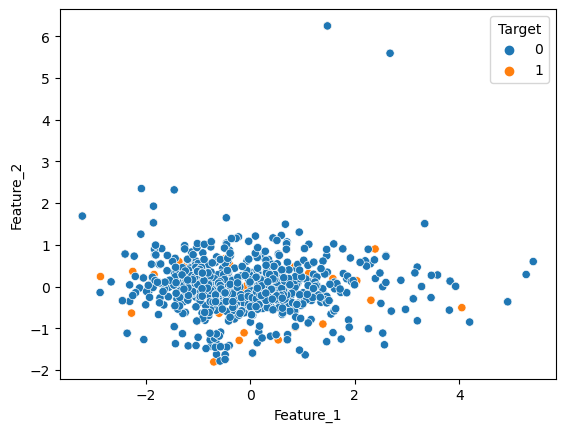

In [19]:
sns.scatterplot(data = x_pca, x='Feature_1', y='Feature_2', hue = 'Target')

In [37]:
X3p_train, X3p_test, y3p_train, y3p_test = train_test_split(x_pca, x_pca['Target'], test_size=0.3, random_state=0)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
bpnn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
svm = SVC(kernel='rbf', gamma='scale', probability=True)
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0),
                            n_estimators=100, random_state=0)
ada_svm = AdaBoostClassifier(base_estimator=SVC(kernel='rbf', gamma='scale', probability=True),
                             n_estimators=100, random_state=0)
xgb = XGBClassifier()

In [39]:
models3p = [knn, bpnn, svm, rf, ada_rf, ada_svm, xgb]
model_names = ['KNN', 'BPNN', 'Kernel SVM', 'Random Forest', 'Adaboost Random Forest', 'Adaboost SVM', 'XGBoost']

In [40]:
for i, model3p in enumerate(models3p):
    print(f"Training {model_names[i]}...")
    model3p.fit(X3p_train,y3p_train)

Training KNN...
Training BPNN...
Training Kernel SVM...
Training Random Forest...
Training Adaboost Random Forest...
Training Adaboost SVM...
Training XGBoost...


C:\Users\SOURAV KUMAR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy: 1.0
KNN confusion matrix:
[[226   0]
 [  0  80]]
KNN ROC AUC: 1.0


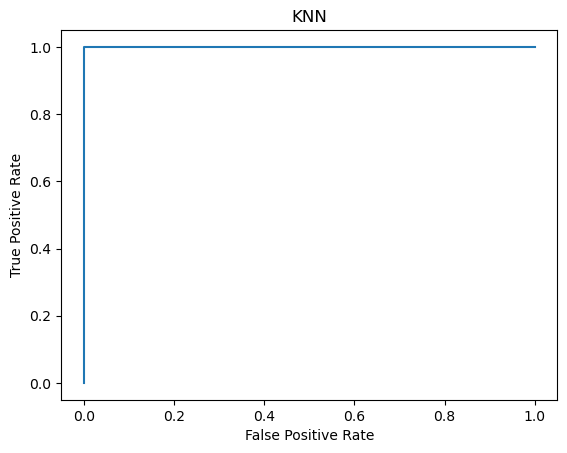

----------------------------------------------------
BPNN accuracy: 1.0
BPNN confusion matrix:
[[226   0]
 [  0  80]]
BPNN ROC AUC: 1.0


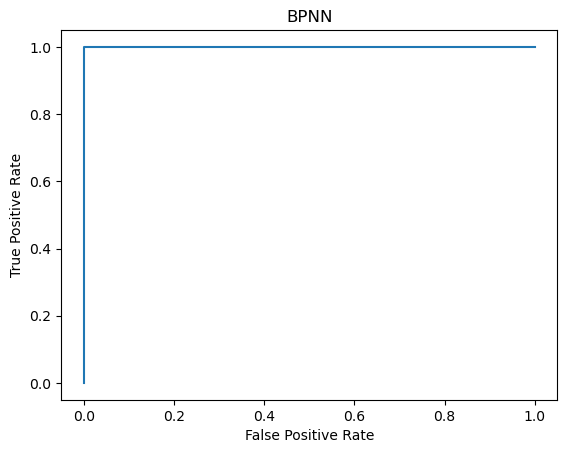

----------------------------------------------------
Kernel SVM accuracy: 0.9967320261437909
Kernel SVM confusion matrix:
[[225   1]
 [  0  80]]
Kernel SVM ROC AUC: 0.9999999999999999


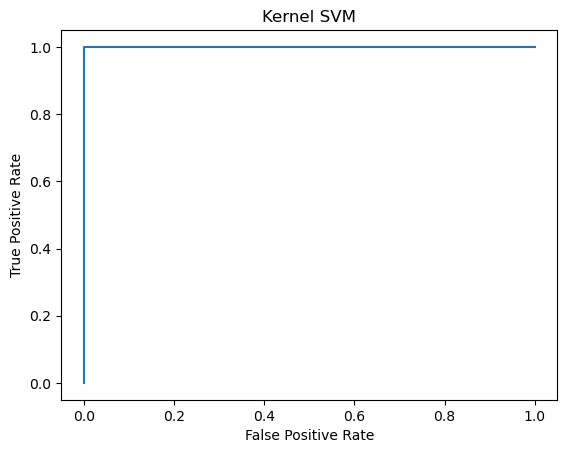

----------------------------------------------------
Random Forest accuracy: 1.0
Random Forest confusion matrix:
[[226   0]
 [  0  80]]
Random Forest ROC AUC: 1.0


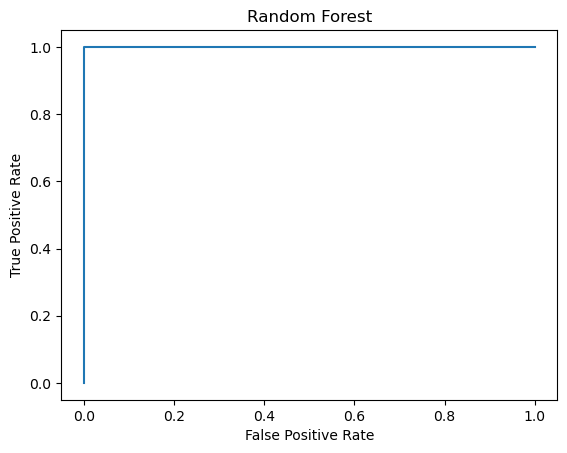

----------------------------------------------------
Adaboost Random Forest accuracy: 1.0
Adaboost Random Forest confusion matrix:
[[226   0]
 [  0  80]]
Adaboost Random Forest ROC AUC: 1.0


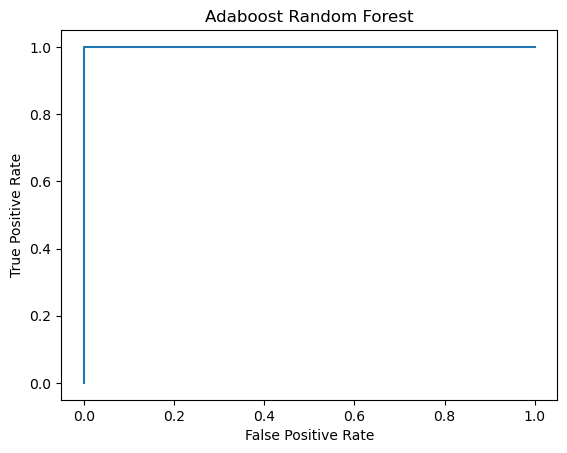

----------------------------------------------------
Adaboost SVM accuracy: 0.9869281045751634
Adaboost SVM confusion matrix:
[[222   4]
 [  0  80]]
Adaboost SVM ROC AUC: 0.9984513274336283


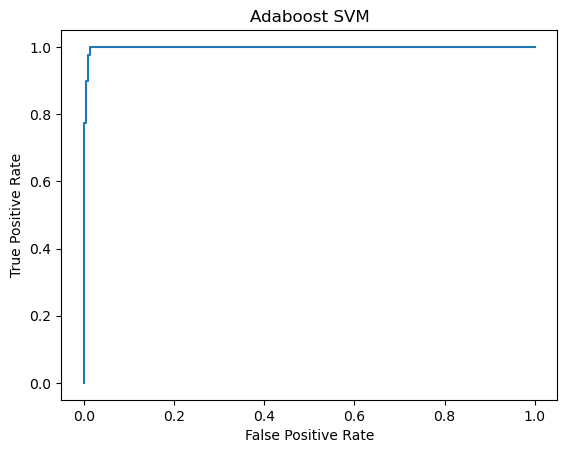

----------------------------------------------------
XGBoost accuracy: 1.0
XGBoost confusion matrix:
[[226   0]
 [  0  80]]
XGBoost ROC AUC: 1.0


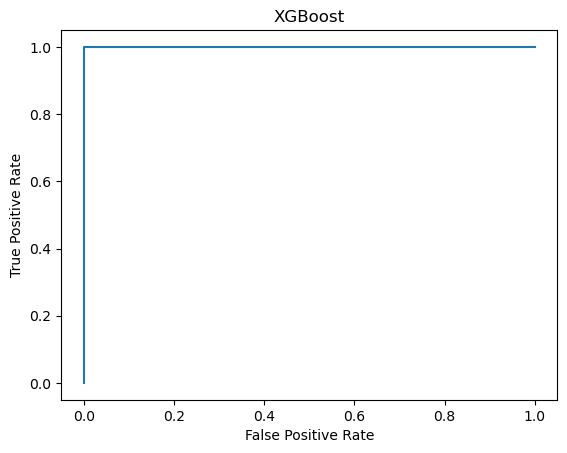

----------------------------------------------------


In [41]:
for i, model3p in enumerate(models3p):
    y_pred = model3p.predict(X3p_test)
    acc = accuracy_score(y3p_test, y_pred)
    cm = confusion_matrix(y3p_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y3p_test, model3p.predict_proba(X3p_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    print(f"{model_names[i]} accuracy: {acc}")
    print(f"{model_names[i]} confusion matrix:\n{cm}")
    print(f"{model_names[i]} ROC AUC: {roc_auc}")
    plt.plot(fpr,tpr)
    plt.title(model_names[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print("----------------------------------------------------")